**【課題1】練習のために特徴量とカテゴリを選択**  
選び方は合計18通りありますが、以下の組み合わせで練習することにします。irisデータセットをWeek3同様に取得した後、データフレームからこれらを抜き出してください。  
- virgicolorとvirginica
- sepal_lengthとpetal_length  

《実際の問題では？》  
実際の問題を解く上でも結果の可視化は有効です。しかし、そのために学習や推定に使う特徴量を2つに絞るのは望ましくありません。そのため学習や推定は多次元で行い、可視化をする際にだけ主成分分析などの特徴抽出手法を適用するといったことが行われます。また、Week3で利用した散布図行列を使い可視化することも可能です。

In [1]:
import pandas as pd
from sklearn import datasets
iris = datasets.load_iris()
X = pd.DataFrame(iris.data, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
y = pd.DataFrame(iris.target, columns=['Species'])
df = pd.concat([X, y], axis=1)
df_sorted = df.query("Species==[1, 2]").loc[:, ['sepal_length', 'petal_length', 'Species']]
df_sorted.head()

,sepal_length,petal_length,Species
50,7.0,4.7,1
51,6.4,4.5,1
52,6.9,4.9,1
53,5.5,4.0,1
54,6.5,4.6,1


**【問題2】データの分析**  
まずはデータの分析を行いますが、これはWeek3の課題1で行いました。その際出力した散布図行列を見ることで、先ほどの18通りそれぞれの散布図も確認できます。sepal_lengthとpetal_lengthを使い、virgicolorとvirginicaを分類するのは少し難しそうな状況であることが分かるはずです。  
ここでは復習を兼ねて、抜き出したデータの散布図と箱ひげ図（boxplot）、バイオリン図（violinplot）を表示してください。  

《実際の問題では？》  
このデータ分析の結果を元に前処理として特徴量エンジニアリングを行っていきます。  
今回はsepal_lengthとpetal_lengthを抜き出しましたが、分析した上で、問題を少々難しくするための前処理をしたと言えます。

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

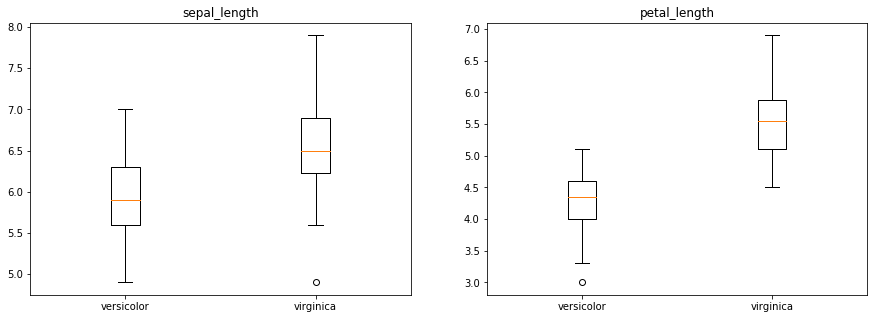

In [3]:
fig = plt.figure(figsize=(15,5))

# for i, feature in enumerate(['sepal_length', 'petal_length'], 1):
#     ax = figure()
#     print()
feature = ['sepal_length', 'petal_length']
species = ['versicolor', 'virginica']

for i, feature in enumerate(feature, 1):
    x = []
    for ii in [1, 2]:
        trg_species = df.loc[df['Species']==ii]
        x.append(list(trg_species[feature]))
    ax = fig.add_subplot(1, 2, i)
    ax.boxplot(x)
    ax.set_xticks([1, 2])
    ax.set_xticklabels(species)
    ax.set_title(feature)

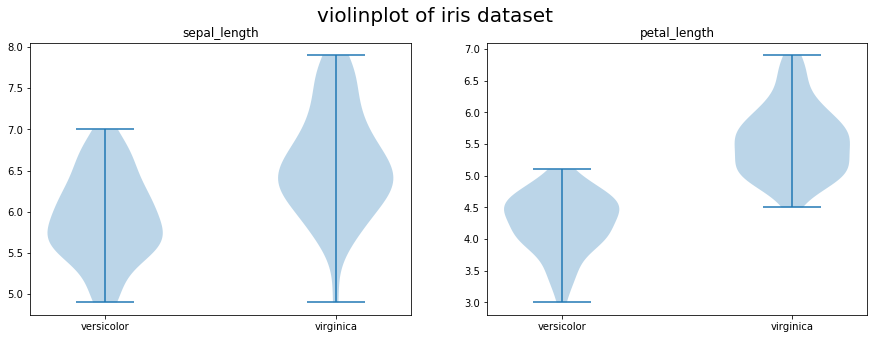

In [4]:
features = ['sepal_length', 'petal_length']
# クラスラベルとしては'Species'列のクラスラベルとして'1=versicolor', '2=virginica'となる
species = ['versicolor', 'virginica']
fig = plt.figure(figsize=(15, 5))
fig.suptitle('violinplot of iris dataset', fontsize=20)

for i, feature in enumerate(features, 1):
    x = []
    for ii in [1, 2]:
        trg_species = df.loc[df['Species']==ii]
        x.append(list(trg_species[feature]))
    ax = fig.add_subplot(1, 2, i)
    ax.violinplot(x)
    ax.set_xticks([1, 2])
    ax.set_xticklabels(species)
    ax.set_title(feature)

**【問題3】前処理・訓練データと検証データの分割**  
前処理の一貫として、訓練データと検証データの分割を行います。今回は訓練データ75%、検証データ25%として分割してください。  
scikit-learnのtrain_test_splitが利用できます。公式ドキュメントのExamplesを参考に動かしてください。  
sklearn.model_selection.train_test_split — scikit-learn 0.21.3 documentation  

《注意点》  
データの分析まではPandasのDataFrameを使用してきました。しかし、scikit-learnはNumPyのndarrayを想定して作られています。
そのため、この段階でndarrayへの変換を行いましょう。特徴量（説明変数）をX、正解（目的変数）をyというndarrayに格納します。  

《分割する理由》  
分類問題の目的は未知のデータを正しく分類することです。その目的が達成できているかを確認するため、実際には答えの分かっているデータの一部を学習には使わず残しておきます。この学習に使用していないデータで推定を行い、そこから求めた指標値によって検証します。  
学習に使うデータを訓練データ、検証に使うデータが検証データで、一般的に7対3から8対2程度の割合にします。

In [5]:
import numpy as np
from sklearn.model_selection import train_test_split

X = df_sorted.iloc[:, :-1].values
y = df_sorted.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

**【問題4】前処理・標準化**  
分類精度をあげるための加工を行います。手法ごとに適切な方法は異なりますが、ここでは一例として 標準化 を行うことにします。  
標準化を行うライブラリもscikit-learnに用意されています。これを使って標準化してください。  
sklearn.model_selection.train_test_split — scikit-learn 0.21.3 documentation  

《注意点》  
標準化は訓練用のデータでfitを行い、訓練用、検証用双方のデータにtransformを行います。検証データは学習の段階には存在しない未知のデータの代わりなので、標準化のための平均や標準偏差の計算に使ってはいけません。  

《実際の問題での前処理は？》  
アヤメのデータセットのように綺麗で扱いやすい状況で提供されることはまずありません。  
分析を行いながら、様々な加工が必要になってきます。例えばWeek3の課題2で行った欠損値の確認の後、場合により欠損値の補間も行います。  
外れ値の確認や、複数のデータセットの整理などもあります。

In [6]:
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
stdsc.fit(X_train)
X_train_std = stdsc.transform(X_train)
X_test_std = stdsc.transform(X_test)

**【問題5】学習と推定**  
最近傍法（k-nearest neighbors, k-nn）で学習を行います。  
scikit-learnの公式ドキュメントのExamplesを参考に、k-nnの学習を行ってください。ここで入力するのは訓練データです。  
sklearn.neighbors.KNeighborsClassifier — scikit-learn 0.21.3 documentation  
学習が終わった後、検証データをpredictメソッドに入力し、推定を行ってください。  
パラメータが複数ありますが、今はそれらの理解を重視しません。最も基本的な要素として、n_neighborsの数があるため、これは複数試してみましょう。デフォルトの5、および1と3を最低限行ってください。5の場合を5-nn、3の場合を3-nnのように呼びます。

In [7]:
from sklearn.neighbors import KNeighborsClassifier

knn5 = KNeighborsClassifier(n_neighbors=5)
knn5.fit(X_train_std, y_train)
y_pred5 = knn5.predict(X_test_std)
print("y_pred5 = ", y_pred5)

knn3 = KNeighborsClassifier(n_neighbors=3)
knn3.fit(X_train_std, y_train)
y_pred3 = knn3.predict(X_test_std)
print("y_pred3 = ", y_pred3)

knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(X_train_std, y_train)
y_pred1 = knn1.predict(X_test_std)
print("y_pred1 = ", y_pred1)

y_pred5 =  [2 2 1 1 2 2 1 2 2 2 1 2 1 1 2 1 1 2 1 2 1 2 2 1 2]
y_pred3 =  [2 2 1 1 2 2 2 2 2 2 1 2 1 1 2 1 1 2 1 2 1 2 2 1 2]
y_pred1 =  [2 2 1 1 2 2 1 2 1 2 1 2 1 1 2 1 1 2 1 2 1 1 2 1 2]


**【問題6】評価**  
検証データの特徴量を入力して得られた推定値と、検証データの正解値の近さを計算し、学習したモデルを評価します。  
2値分類を評価するための指標値には Accuracy（正解率）、Precision（適合率）、Recall（再現率）、F値 があります。  
それぞれの意味を理解するには、 混同行列（confusion matrix） を見ることになります。  
- scikit-learnを使い4種類の指標を計算する
- 混同行列をscikit-learnを使い表示する
- 4種類の指標値の意味について簡単に調査して文章でまとめる

In [8]:
# scikit-learnを使い4種類の指標を計算する
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

pred_results = [y_pred5, y_pred3, y_pred1]
labels = ['knn5', 'knn3', 'knn1']

for pred, label in zip(pred_results, labels):
    print(label + '=')
    print('Accuracy : %.3f' % accuracy_score(y_true=y_test, y_pred=pred))
    print('Precision : %.3f' % precision_score(y_true=y_test, y_pred=pred))
    print('Recall : %.3f' % recall_score(y_true=y_test, y_pred=pred))
    print('F1 : %.3f\n' % f1_score(y_true=y_test, y_pred=pred))

knn5=
Accuracy : 0.840
Precision : 0.909
Recall : 0.769
F1 : 0.833

knn3=
Accuracy : 0.800
Precision : 0.900
Recall : 0.692
F1 : 0.783

knn1=
Accuracy : 0.840
Precision : 0.846
Recall : 0.846
F1 : 0.846



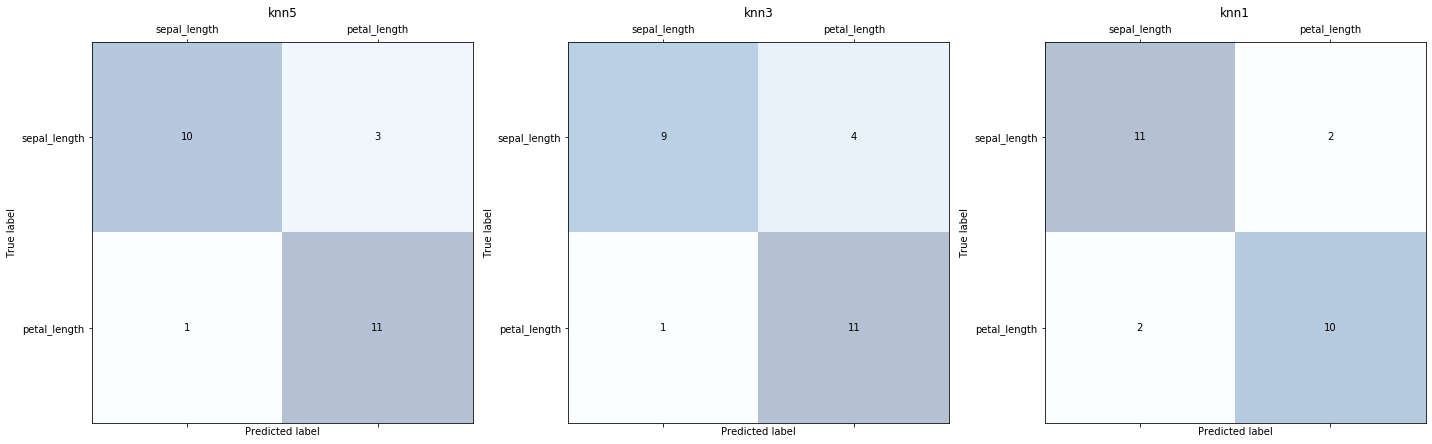

In [9]:
# 混同行列をscikit-learnを使い表示する
numbers = [1, 2, 3]
fig = plt.figure(figsize=(20,8))
for pred, label, num in zip(pred_results, labels, numbers):
    ax = fig.add_subplot(1, 3, num)
    confmat = confusion_matrix(y_true=y_test, y_pred=pred)
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
    ax.set_xlabel('predicted label')
    ax.set_ylabel('true label')
#     ax.set_xticklabels(['sepal_length', 'petal_length'])
#     ax.set_yticklabels(['sepal_length', 'petal_length'])
    ax.set(xticks=np.arange(confmat.shape[1]),
           yticks=np.arange(confmat.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=['sepal_length', 'petal_length'], yticklabels=['sepal_length', 'petal_length'],
           title=label,
           ylabel='True label',
           xlabel='Predicted label')
plt.tight_layout()
plt.show()

4種類の指標値の意味について簡単に調査して文章でまとめる
- 正解率  
正しい予測の合計を予測の総数で割ったもの

- 適合率  
正と予測したデータのうち，実際に正であるものの割合

- 再現率  
実際に正であるもののうち，正であると予測されたものの割合

- F1値
再現率と適合率の調和平均

**【問題7】可視化**  
評価の一貫として可視化を行います。今回の場合2次元の特徴量で分類を行いましたから、散布図で可視化が可能です。  
以下にどう分割するかという 決定領域 を描く関数を用意しました。これを利用して可視化を行ってください。  
Xとyには訓練データまたは検証データを与えます。

In [10]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。

    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

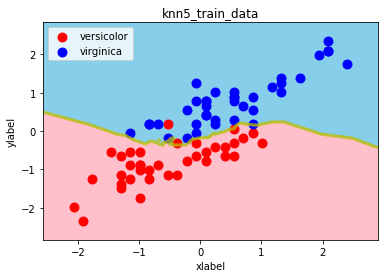

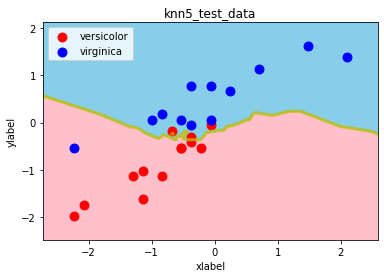

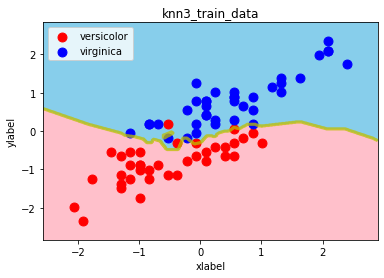

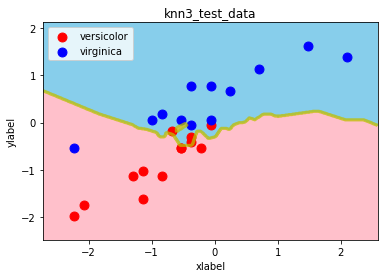

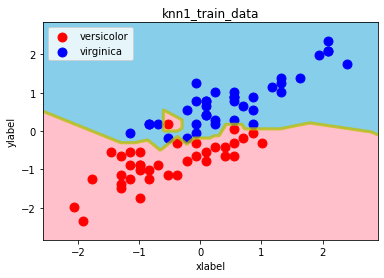

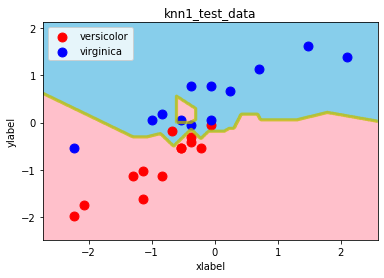

In [11]:
models = [knn5, knn3, knn1]
pred_results = [y_pred5, y_pred3, y_pred1]
labels = ['knn5', 'knn3', 'knn1']
numbers = [1, 2]
titles = ['train_data', 'test_data']



for model, label, pred in zip(models, labels, pred_results):
    for title, num in zip(titles, numbers):
        if num==1:
            X = X_train_std
            y = y_train
        else:
            X = X_test_std
            y = y_test
        decision_region(X, y, model=model, title=label+"_"+title)

**【問題8】他の手法の学習**  
以下の全ての手法について学習・推定・評価・可視化を行ってください。そして、指標値を１つの表にまとめてください。その表と決定領域を利用して結果を簡単に考察してください。どの手法がどの指標値で良かったかや、どういった決定領域になっていたかを述べてください。  

- 最近傍法
- ロジスティック回帰
- SVM
- 決定木
- ランダムフォレスト  

公式ドキュメントへのリンクは以下です。それぞれ調整すべき引数（ハイパーパラメータ）がありますが、この課題では扱いません。まずはデフォルトの値で実行してください。  

- sklearn.neighbors.KNeighborsClassifier — scikit-learn 0.21.3 documentation
- sklearn.linear_model.LogisticRegression — scikit-learn 0.21.3 documentation
- sklearn.svm.SVC — scikit-learn 0.21.3 documentation
- sklearn.tree.DecisionTreeClassifier — scikit-learn 0.21.3 documentation
- sklearn.ensemble.RandomForestClassifier — scikit-learn 0.21.3 documentation

《実際の問題では？》  
ハイパーパラメータの調整は パラメータチューニング と呼ばれる工程で、その手法としてグリッドサーチなどが存在します。

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [13]:
def print_metrics_results(y_test, pred):
    print('Accuracy : %.3f' % accuracy_score(y_true=y_test, y_pred=pred))
    print('Precision : %.3f' % precision_score(y_true=y_test, y_pred=pred))
    print('Recall : %.3f' % recall_score(y_true=y_test, y_pred=pred))
    print('F1 : %.3f\n' % f1_score(y_true=y_test, y_pred=pred))

Accuracy : 0.840
Precision : 0.909
Recall : 0.769
F1 : 0.833



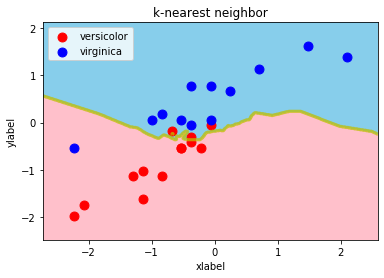

In [14]:
# k近傍法
knn5 = KNeighborsClassifier(n_neighbors=5)
knn5.fit(X_train_std, y_train)
y_pred_knn5 = knn5.predict(X_test_std)
print_metrics_results(y_test, y_pred_knn5)
decision_region(X_test_std, y_test, model=knn5, title='k-nearest neighbor')

Accuracy : 0.920
Precision : 0.923
Recall : 0.923
F1 : 0.923



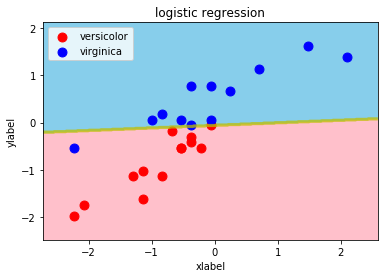

In [15]:
# ロジスティック回帰
lr = LogisticRegression()
lr.fit(X_train_std, y_train)
y_pred_lr = lr.predict(X_test_std)
print_metrics_results(y_test, y_pred_lr)
decision_region(X_test_std, y_test, model=lr, title='logistic regression')

Accuracy : 0.920
Precision : 0.923
Recall : 0.923
F1 : 0.923



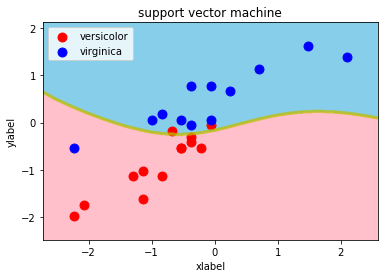

In [16]:
# サポートベクトルマシン
svm = SVC()
svm.fit(X_train_std, y_train)
y_pred_svm = lr.predict(X_test_std)
print_metrics_results(y_test, y_pred_svm)
decision_region(X_test_std, y_test, model=svm, title='support vector machine')

Accuracy : 0.920
Precision : 0.923
Recall : 0.923
F1 : 0.923



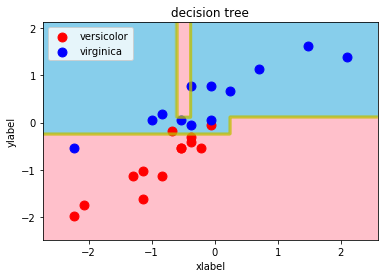

In [17]:
# 決定木
tree = DecisionTreeClassifier()
tree.fit(X_train_std, y_train)
y_pred_tree = lr.predict(X_test_std)
print_metrics_results(y_test, y_pred_tree)
decision_region(X_test_std, y_test, model=tree, title='decision tree')

Accuracy : 0.920
Precision : 0.923
Recall : 0.923
F1 : 0.923



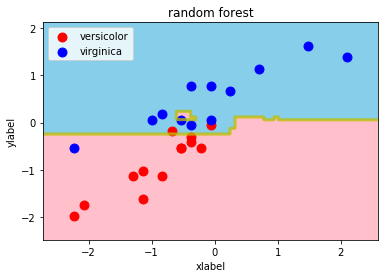

In [18]:
# ランダムフォレスト
forest = RandomForestClassifier()
forest.fit(X_train_std, y_train)
y_pred_forest = lr.predict(X_test_std)
print_metrics_results(y_test, y_pred_forest)
decision_region(X_test_std, y_test, model=forest, title='random forest')

4つの機械学習モデルを使って学習、推定、評価を行ったが、正解率、適合率、再現率、F値の結果はどれも同じになった。  
しかし、決定領域はどのモデルも異なっていたため、特徴量やデータ数が増えた場合には、評価結果は異なってくると考える。

**【問題9】（アドバンス課題）標準化の有無の比較**  
前処理として標準化を行いましたが、これを行わなかった場合どのような結果が得られるでしょうか。  
各手法に対しての指標値の表と決定領域の図を作成し比較および考察を行ってください。  
考察には標準化が機械学習の前処理としてどのような意味があるかを絡めてください。

Accuracy : 0.840
Precision : 0.909
Recall : 0.769
F1 : 0.833



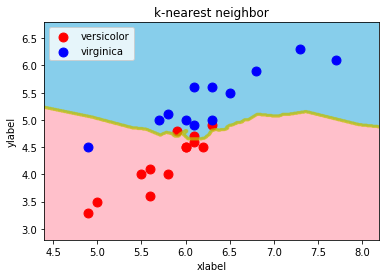

In [19]:
# k近傍法
knn5 = KNeighborsClassifier(n_neighbors=5)
knn5.fit(X_train, y_train)
y_pred_knn5 = knn5.predict(X_test)
print_metrics_results(y_test, y_pred_knn5)
decision_region(X_test, y_test, model=knn5, title='k-nearest neighbor')

Accuracy : 0.960
Precision : 0.929
Recall : 1.000
F1 : 0.963



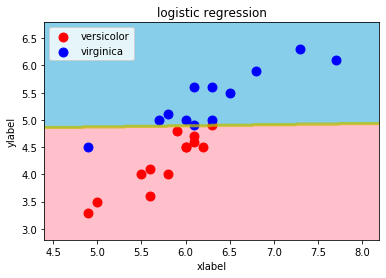

In [20]:
# ロジスティック回帰
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print_metrics_results(y_test, y_pred_lr)
decision_region(X_test, y_test, model=lr, title='logistic regression')

Accuracy : 0.960
Precision : 0.929
Recall : 1.000
F1 : 0.963



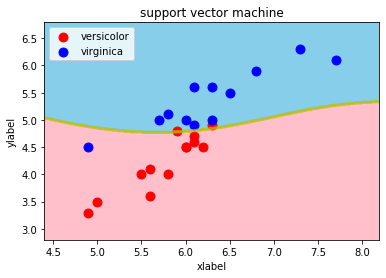

In [21]:
# サポートベクトルマシン
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = lr.predict(X_test)
print_metrics_results(y_test, y_pred_svm)
decision_region(X_test, y_test, model=svm, title='support vector machine')

Accuracy : 0.960
Precision : 0.929
Recall : 1.000
F1 : 0.963



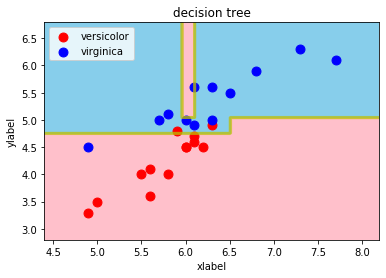

In [22]:
# 決定木
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_pred_tree = lr.predict(X_test)
print_metrics_results(y_test, y_pred_tree)
decision_region(X_test, y_test, model=tree, title='decision tree')

Accuracy : 0.960
Precision : 0.929
Recall : 1.000
F1 : 0.963



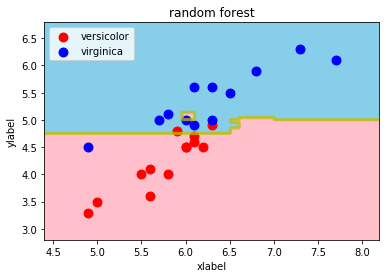

In [23]:
# ランダムフォレスト
forest = RandomForestClassifier()
forest.fit(X_train, y_train)
y_pred_forest = lr.predict(X_test)
print_metrics_results(y_test, y_pred_forest)
decision_region(X_test, y_test, model=forest, title='random forest')

k近傍法を除いて、他のモデルでは特徴量を標準化しない方が、評価結果の数値がわずかに良かった。  
ただし、これはサンプル数が少ないことによる誤差の範囲と推測する。  
今回sepal_lengthとpetal_lengthの平均的な大きさに大きな差異がないため、標準化ありなしで大きな差はなかった。  
特徴量毎に大きさに差異がある場合は、標準化をしないと比較的値が大きい特徴量に大きく重みづけされてしまうめ、標準化が重要となると考える。

**【問題10】（アドバンス課題）全ての目的変数を使用して精度が高い手法**  
ここまではアヤメの種類を減らし2値分類を行ってきましたが、3種類全てを使った多値分類を行います。  
学習と推定、評価を行って、最も精度の高い手法を探してください。  

《多値になることでの変更点》  
指標値Precision（適合率）、Recall（再現率）、F値はライブラリのパラメータをデフォルトから変更する必要があります。  
マイクロ平均やマクロ平均という考え方を使います。  
決定領域を可視化する前述の関数は適切に書き換える必要があります。以下が出力例です。

In [24]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
def decision_regions(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['setosa', 'versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。

    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue', 'green']
    contourf_color = ['pink', 'skyblue', 'yellow']
    n_class = 3
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

In [25]:
def print_metrics_results2(y_test, pred):
    print('Accuracy : %.3f' % accuracy_score(y_true=y_test, y_pred=pred))
    print('Precision(macro) : %.3f' % precision_score(y_true=y_test, y_pred=pred, average='macro'))
    print('Precision(micro) : %.3f' % precision_score(y_true=y_test, y_pred=pred, average='micro'))
    print('Recall(macro) : %.3f' % recall_score(y_true=y_test, y_pred=pred, average='macro'))
    print('Recall(micro) : %.3f' % recall_score(y_true=y_test, y_pred=pred, average='micro'))
    print('F1(macro) : %.3f' % f1_score(y_true=y_test, y_pred=pred, average='macro'))
    print('F1(micro) : %.3f\n' % f1_score(y_true=y_test, y_pred=pred, average='micro'))

In [26]:
df_sorted2 = df.loc[:, ['sepal_length', 'petal_length', 'Species']]
X2 = df_sorted2.iloc[:, :-1].values
y2 = df_sorted2.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.25, random_state=42, stratify=y2)

k-nearest neighbor
Accuracy : 0.947
Precision(macro) : 0.956
Precision(micro) : 0.947
Recall(macro) : 0.949
Recall(micro) : 0.947
F1(macro) : 0.948
F1(micro) : 0.947



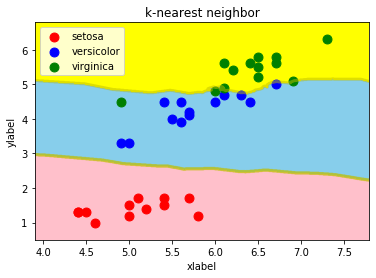

logistic regression
Accuracy : 0.921
Precision(macro) : 0.925
Precision(micro) : 0.921
Recall(macro) : 0.923
Recall(micro) : 0.921
F1(macro) : 0.923
F1(micro) : 0.921



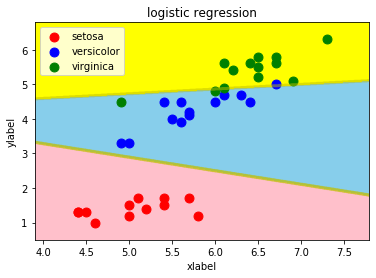

support vector machine
Accuracy : 0.921
Precision(macro) : 0.925
Precision(micro) : 0.921
Recall(macro) : 0.923
Recall(micro) : 0.921
F1(macro) : 0.923
F1(micro) : 0.921



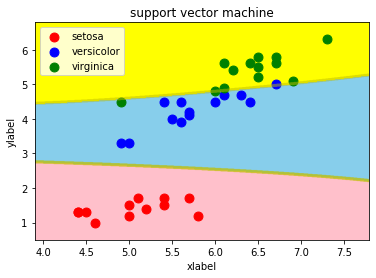

decision tree
Accuracy : 0.921
Precision(macro) : 0.925
Precision(micro) : 0.921
Recall(macro) : 0.923
Recall(micro) : 0.921
F1(macro) : 0.923
F1(micro) : 0.921



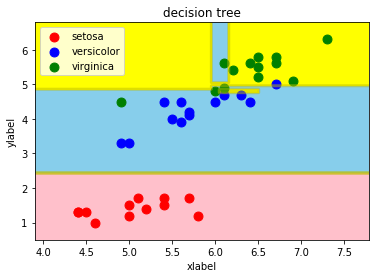

random forest
Accuracy : 0.921
Precision(macro) : 0.925
Precision(micro) : 0.921
Recall(macro) : 0.923
Recall(micro) : 0.921
F1(macro) : 0.923
F1(micro) : 0.921



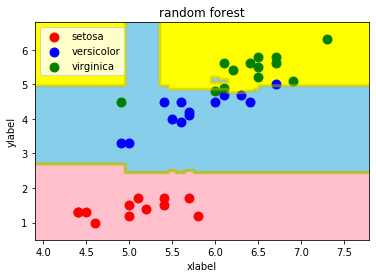

In [27]:
# k近傍法
print('k-nearest neighbor')
knn5 = KNeighborsClassifier(n_neighbors=5)
knn5.fit(X_train, y_train)
y_pred_knn5 = knn5.predict(X_test)
print_metrics_results2(y_test, y_pred_knn5)
decision_regions(X_test, y_test, model=knn5, title='k-nearest neighbor')

# ロジスティック回帰
print('logistic regression')
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print_metrics_results2(y_test, y_pred_lr)
decision_regions(X_test, y_test, model=lr, title='logistic regression')

# サポートベクトルマシン
print('support vector machine')
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = lr.predict(X_test)
print_metrics_results2(y_test, y_pred_svm)
decision_regions(X_test, y_test, model=svm, title='support vector machine')

# 決定木
print('decision tree')
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_pred_tree = lr.predict(X_test)
print_metrics_results2(y_test, y_pred_tree)
decision_regions(X_test, y_test, model=tree, title='decision tree')

# ランダムフォレスト
print('random forest')
forest = RandomForestClassifier()
forest.fit(X_train, y_train)
y_pred_forest = lr.predict(X_test)
print_metrics_results2(y_test, y_pred_forest)
decision_regions(X_test, y_test, model=forest, title='random forest')

今回はk近傍法が一番精度が高かった